# The Fermi Paradox- "Where is everyone?"

## A friend and I got to talking about the probability of life in the universe, it turns out "Imparactical Python Projects" addresses just such a problem. The basis of the project is the 'Drake Eqation' (look it up on Wikipedia). Here we use parameters such as 

        NUM OF LOCATIONS IN WHICH WE PLACE CIVS
        MAX NUMBER OF ADVANCED CIVILIZATIONS
        NUM OF TIMES TO MODEL A GIVEN NUMBER OF CIVILIZATIONS
        NUM OF CIVIILIZATIONS PER VOLUME
        NUM OF CIVILIZATIONS PER PIXEL
        
        
### ONE HAS TO RUN THIS PROJECT IN A JUPYTER NOTEBOOK TO SEE THE OUTPUT. THE PROJECT IS FUN BECAUSE YOU CAN ADJUST THE PARAMETERS ABOVE TO GET DIFFERENT PROBABILITIES FOR FINDING LIFE IN THE UNIVERSE.
        

        
        


+0.0020 +0.0000
+0.1020 +0.0959
+0.2020 +0.1814
+0.3020 +0.2629
+0.4020 +0.3319
+0.5020 +0.3942
+0.6020 +0.4519
+0.7020 +0.5037
+0.8020 +0.5520
+0.9020 +0.5942
+1.0020 +0.6330
+1.1020 +0.6673
+1.2020 +0.6995
+1.3020 +0.7278
+1.4020 +0.7539
+1.5020 +0.7774
+1.6020 +0.7987
+1.7020 +0.8174
+1.8020 +0.8353
+1.9020 +0.8503
+2.0020 +0.8651
+2.1020 +0.8779
+2.2020 +0.8892
+2.3020 +0.9002
+2.4020 +0.9094
+2.5020 +0.9182
+2.6020 +0.9259
+2.7020 +0.9332
+2.8020 +0.9392
+2.9020 +0.9451
+3.0020 +0.9504
+3.1020 +0.9549
+3.2020 +0.9593
+3.3020 +0.9633
+3.4020 +0.9666
+3.5020 +0.9699
+3.6020 +0.9727
+3.7020 +0.9754
+3.8020 +0.9776
+3.9020 +0.9798
+4.0020 +0.9817
+4.1020 +0.9835
+4.2020 +0.9850
+4.3020 +0.9865
+4.4020 +0.9877
+4.5020 +0.9889
+4.6020 +0.9900
+4.7020 +0.9909
+4.8020 +0.9918
+4.9020 +0.9926

           4           3          2
-0.004773 x + 0.06695 x - 0.3607 x + 0.9209 x + 0.009307


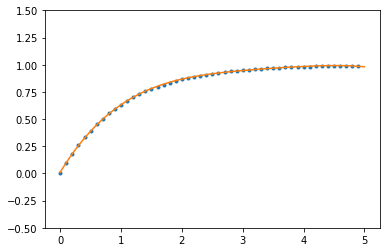

In [1]:
 


from random import randint
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

# probability_of_detection.py, part 1

NUM_EQUIV_VOLUMES = 1000  # NUM OF LOCATIONS IN WHICH WE PLACE CIVS
MAX_CIVS = 5000  # MAX NUMBER OF ADVANCED CIVILIZATIONS
TRIALS = 1000 # NUM OF TIMES TO MODEL A GIVEN NUMBER OF CIVILIZATIONS
CIV_STEP_SIZE = 100

x = [ ]  # x values for polynomial fit
y = [ ]  # y values for polynomial fit

for num_civs in range (2,  MAX_CIVS + 2 , CIV_STEP_SIZE ) :
    civs_per_vol = num_civs / NUM_EQUIV_VOLUMES
    num_single_civs = 0

    for trial in range ( TRIALS ) :
        locations = [ ]  # equivalent volumes containing a civilization
        while len ( locations ) < num_civs :
            location = randint ( 1 , NUM_EQUIV_VOLUMES )
            locations.append ( location )
            
        overlap_count = Counter ( locations )
        overlap_count = Counter ( locations )
        overlap_rollup = Counter ( overlap_count.values () )
        num_single_civs += overlap_rollup [ 1 ]

    prob = 1 - (num_single_civs / (num_civs * TRIALS))

    # print ratio of civs-per-volume vs. probability of 2+ civs per locations
    print ( "{:+.4f} {:+.4f}".format ( civs_per_vol , prob ) )
    x.append ( civs_per_vol )
    y.append ( prob )

    
# probability_of_detection, part 2
coefficients = np.polyfit(x, y, 4) # 4th order polynomial fit
p = np.poly1d(coefficients)
print("\n{}".format(p))
xp = np.linspace(0, 5)
_ = plt.plot(x, y, '.', xp, p(xp), '-')
plt.ylim(-0.5, 1.5)
plt.show()

In [2]:
import tkinter as tk
from random import randint, uniform, random
import math

SCALE = 225 # enter 225 to see Earth's radio bubble
NUM_CIVS = 15600000

root = tk.Tk()
root.title("Milky Way Galaxy")
c = tk.Canvas(root, width = 1000, height = 800, bg = 'black')
c.grid()
c.configure(scrollregion=( -500, -400, 500, 400))

# actual Milky Way dimensions (light-years)
DISC_RADIUS = 35000
DISC_HEIGHT = 1000
DISC_VOL = math.pi * DISC_RADIUS**2 * DISC_HEIGHT

# galaxy_simulator.py, part 3

def scale_galaxy():
    """ Scale galaxy dimensions based on radio bubble size """
    disc_radius_scaled = round(DISC_RADIUS/ SCALE)
    bubble_vol = 4/3 * math.pi * (SCALE / 2)**3
    disc_vol_scaled = DISC_VOL/bubble_vol
    return disc_radius_scaled, disc_vol_scaled

def detect_prob(disc_vol_scaled):
    """ Calculate probability of galactic civilizations detecting each other"""
    ratio = NUM_CIVS/disc_vol_scaled # ratio of civs to scaled galaxy volume
    if ratio < 0.002: # set very low ratios of probability of 002
        detection_prob = 0
    elif ratio >= 5: # set very high ratios of prob
        detection_prob = 1
    else:
        detection_prob = -0.004757 * ratio**4 + 0.06681 * ratio**3 - 0.3605 * \
            ratio**2 + 0.9215 * ratio + 0.00826
    return round(detection_prob, 3)

# galaxy_simulator.py, part 4

def random_polar_coordinates(disc_radius_scaled):
    """Generate uniform random (x, y) point within a disc for 2D display."""
    r = random()
    theta = uniform(0, 2 * math.pi)
    x = round(math.sqrt(r) * math.cos(theta) * disc_radius_scaled)
    y = round(math.sqrt(r) * math.sin(theta) * disc_radius_scaled)
    return x, y

# galaxy_simulator.py, part 5

def spirals(b, r, rot_fac, fuz_fac, arm):
    """Build spiral arms for tkinter display using logarithmic spiral formula.
    b = arbitrary constant in logarithmic spiral equation
    r = scaled galactic disc radius
    rot_fac = rotation factor
    fuz_fac = random shift in star position in arm, applied to 'fuzz' variable
    arm = spiral arm (0 = main arm, 1 = trailing stars)
    """ 
    spiral_stars = []
    fuzz = int(0.030 * abs(r)) # randomly shift star locations
    theta_max_degrees = 520
    for i in range(theta_max_degrees):  # range(0, 600, 2) for no black hole
        theta = math.radians(i)
        x = r * math.exp(b * theta) * math.cos(theta + math.pi * rot_fac)\
            + randint(-fuzz, fuzz) * fuz_fac
        y = r * math.exp(b * theta) * math.sin(theta + math.pi * rot_fac)\
            + randint(-fuzz, fuzz) * fuz_fac
        spiral_stars.append((x, y))
    
    for x, y in spiral_stars:
        if arm == 0 and int(x % 2) == 0:
            c.create_oval(x-2, y-2, x+2, y+2, fill='white', outline='')
        elif arm == 0 and int(x % 2) != 0:
            c.create_oval(x-1, y-1, x+1, y+1, fill='white', outline='')
        elif arm == 1:
            c.create_oval(x, y, x, y, fill='white', outline='')
        
# galaxy_simulator.py, part 6


def star_haze(disc_radius_scaled, density):
    """Randomly distribute faint tkinter stars in galactic disc.
           disc_radius_scaled = galactic disc radius scaled to radio bubble diameter 
          density = multiplier to vary number of stars poste
     """
    for i in range(0, disc_radius_scaled * density):
        x, y = random_polar_coordinates(disc_radius_scaled)
        c.create_text(x, y, fill='white', font=('Helvetica', '7'), text='.')
    

def main():
    """Calculate detection probability & post galaxy display & statistics."""
    disc_radius_scaled, disc_vol_scaled = scale_galaxy()
    detection_prob = detect_prob(disc_vol_scaled)

    # build 4 main spiral arms & 4 trailing arms
    spirals(b=-0.3, r=disc_radius_scaled, rot_fac=2, fuz_fac=1.5, arm=0)
    spirals(b=-0.3, r=disc_radius_scaled, rot_fac=1.91, fuz_fac=1.5, arm=1)
    spirals(b=-0.3, r=-disc_radius_scaled, rot_fac=2, fuz_fac=1.5, arm=0)
    spirals(b=-0.3, r=-disc_radius_scaled, rot_fac=-2.09, fuz_fac=1.5, arm=1)
    spirals(b=-0.3, r=-disc_radius_scaled, rot_fac=0.5, fuz_fac=1.5, arm=0)
    spirals(b=-0.3, r=-disc_radius_scaled, rot_fac=0.4, fuz_fac=1.5, arm=1)
    spirals(b=-0.3, r=-disc_radius_scaled, rot_fac=-0.5, fuz_fac=1.5, arm=0)
    spirals(b=-0.3, r=-disc_radius_scaled, rot_fac=-0.6, fuz_fac=1.5, arm=1)
    star_haze(disc_radius_scaled, density=8)

    # display legend
    c.create_text(-455, -360, fill='white', anchor='w',
                     text='One Pixel = {} LY'.format(SCALE))
    c.create_text(-455, -330, fill='white', anchor='w',
                     text='Radio Bubble Diameter = {} LY'.format(SCALE))
    c.create_text(-455, -300, fill='white', anchor='w',
                     text='Probability of detection for {:,} civilizations = {}'.
                     format(NUM_CIVS, detection_prob))

    # post Earth's 225 LY diameter bubble and annotate
    if SCALE == 225:
        c.create_rectangle(115, 75, 116, 76, fill='red', outline='')
        c.create_text(118, 72, fill='red', anchor='w',
                         text="<---------- Earth's Radio Bubble")

    # run tkinter loop
    root.mainloop()
if __name__ == '__main__':
    main()